In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('mnist_train.csv')

In [40]:
l=df['label']

In [41]:
d=df.drop('label',axis=1)
labels=l.head(15000)
data=d.head(15000)

In [42]:
standardized_data=StandardScaler().fit_transform(data)

C:\Users\anchal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anchal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
print(standardized_data.shape)

(15000, 784)


In [44]:
sample_data=standardized_data

In [45]:
covar_matrix=np.matmul(sample_data.T,sample_data)

In [86]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
vectors=vectors.T
row_cord=np.matmul(vectors,sample_data.T)
#above step can be directly dine in sklearn's pca

In [87]:
new_cord=np.vstack((row_cord,labels)).T

In [88]:
dataframe=pd.DataFrame(new_cord,columns=('1st Principal','2nd Principal','Label'))

C:\Users\anchal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


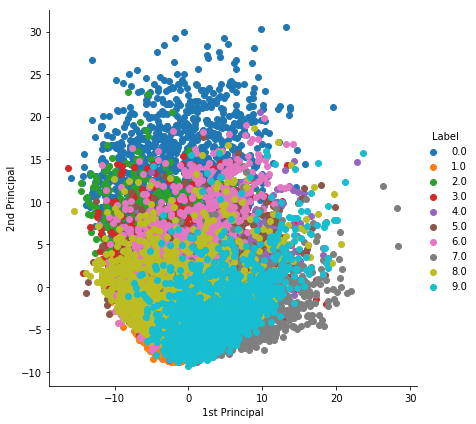

In [89]:
sns.FacetGrid(dataframe,hue='Label',size=6).map(plt.scatter,'1st Principal','2nd Principal').add_legend()

In [90]:
#Scikit-learn PCA

In [91]:
from sklearn import decomposition
pca=decomposition.PCA()

In [92]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

In [93]:
pca_data=np.vstack((pca_data.T,labels)).T

C:\Users\anchal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


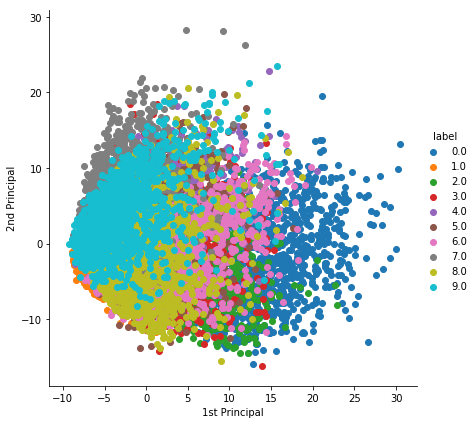

In [94]:
pca_df=pd.DataFrame(pca_data,columns=('1st Principal','2nd Principal','label'))
sns.FacetGrid(pca_df,hue='label',size=6).map(plt.scatter,'1st Principal','2nd Principal').add_legend()

In [95]:
##lots of overlapping resulting in bad analysis Hence a drawback of PCA when bringing large dimensions to 2D

In [97]:
pca.n_components=784
pca_value=pca.fit_transform(sample_data)
val=pca.explained_variance_/sum(pca.explained_variance_)
val=np.cumsum(val)

In [98]:
plt.clf()

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'percentage of variance')

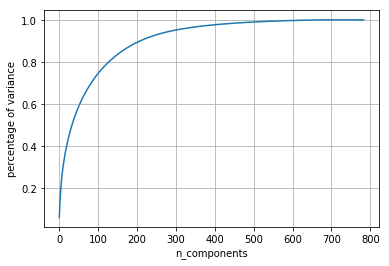

In [101]:
plt.plot(val)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('percentage of variance')